In [164]:
import pandas as pd
import yfinance as yf

In [165]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.preprocessing import StandardScaler

In [166]:
import vectorbt as vbt
import talib as ta

In [167]:
import warnings
warnings.filterwarnings('ignore')

In [168]:
'''
1. Apple (AAPL) 2. Microsoft (MSFT) 3. Alphabet (GOOGL) 4. Amazon
(AMZN) 5. Meta (META) 6. Tesla (TSLA) 7. JPMorgan Chase (JPM) 8. Visa (V) 9.
Johnson & Johnson (JNJ) 10. Berkshire Hathaway (BRK.B)

'''

# Loading Data

stocks = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META', 'TSLA', 'JPM', 'V', 'JNJ', 'BRK-B'] #Changed BRK.B to BRK-B

'''

stock_dict = {}

for stock in stocks:
    df = yf.download(stock, start = '2017-01-01', end = '2025-12-31')
    stock_dict[stock] = df

    df['Stock'] = stock 

'''

"\n\nstock_dict = {}\n\nfor stock in stocks:\n    df = yf.download(stock, start = '2017-01-01', end = '2025-12-31')\n    stock_dict[stock] = df\n\n    df['Stock'] = stock \n\n"

In [169]:
stock_prices = yf.download(stocks, start = '2017-01-01', end = '2025-12-31')
stock_prices.head(10)

[*********************100%***********************]  10 of 10 completed


Price           Close                                                          \
Ticker           AAPL       AMZN       BRK-B      GOOGL        JNJ        JPM   
Date                                                                            
2017-01-03  26.796835  37.683498  163.830002  40.123768  90.873306  68.519814   
2017-01-04  26.766834  37.859001  164.080002  40.111839  90.724266  68.646202   
2017-01-05  26.902966  39.022499  163.300003  40.372547  91.673462  68.014275   
2017-01-06  27.202883  39.799500  163.410004  40.977875  91.234161  68.022186   
2017-01-09  27.452047  39.846001  162.020004  41.075695  91.218468  68.069603   
2017-01-10  27.479733  39.794998  161.470001  41.017597  91.124344  68.267036   
2017-01-11  27.627382  39.951000  162.229996  41.208778  90.002533  68.780457   
2017-01-12  27.512032  40.681999  161.410004  41.192394  89.916260  68.116989   
2017-01-13  27.463587  40.856998  161.899994  41.262409  89.900581  68.480324   
2017-01-17  27.685064  40.486000  159.639999  41.089603  90.112358  65.992294   

Price                                                    ...     Volume  \
Ticker            META       MSFT       TSLA          V  ...       AAPL   
Date                                                     ...              
2017-01-03  116.144005  56.404682  14.466000  74.832092  ...  115127600   
2017-01-04  117.962791  56.152317  15.132667  75.443916  ...   84472400   
2017-01-05  119.930672  56.152317  15.116667  76.328720  ...   88774400   
2017-01-06  122.653870  56.639027  15.267333  77.382950  ...  127007600   
2017-01-09  124.134743  56.458763  15.418667  76.949974  ...  134247600   
2017-01-10  123.588120  56.440731  15.324667  76.535805  ...   97848400   
2017-01-11  125.317451  56.954479  15.315333  76.997055  ...  110354400   
2017-01-12  125.844208  56.431721  15.306000  76.592278  ...  108344800   
2017-01-13  127.553673  56.512852  15.850000  76.404015  ...  104447600   
2017-01-17  127.086548  56.359619  15.705333  76.488747  ...  137759200   

Price                                                                  \
Ticker           AMZN    BRK-B     GOOGL      JNJ       JPM      META   
Date                                                                    
2017-01-03   70422000  4091000  39180000  5953000  20550700  20663900   
2017-01-04   50210000  3568900  30306000  5828900  15266600  19630900   
2017-01-05  116602000  2982500  26810000  6217200  14300800  19492200   
2017-01-06  119724000  2697000  40342000  5221400  12893300  28545300   
2017-01-09   68922000  3564700  28178000  5457500  12806600  22880400   
2017-01-10   51168000  2671300  23948000  5312800  13989000  17324600   
2017-01-11   59856000  3305900  26508000  8887200  14713100  18356500   
2017-01-12   97478000  3229400  26990000  6627300  21337400  18653900   
2017-01-13   75838000  3081600  25804000  4935200  28296000  24884300   
2017-01-17   73410000  4712800  28818000  6255400  30024600  15294500   

Price                                      
Ticker          MSFT       TSLA         V  
Date                                       
2017-01-03  20694100   88849500  13785200  
2017-01-04  21340000  168202500   8033100  
2017-01-05  24876000   88675500   7805100  
2017-01-06  19922900   82918500   8898300  
2017-01-09  20382700   59692500   7305300  
2017-01-10  18593000   54900000   6017500  
2017-01-11  21517300   54762000   7499200  
2017-01-12  20968200   56853000   6884000  
2017-01-13  19422300   91395000   7291200  
2017-01-17  20664000   69262500   6326500  

[10 rows x 50 columns]

In [170]:
close_prices = stock_prices['Close'].copy()
close_prices.head()

Ticker,AAPL,AMZN,BRK-B,GOOGL,JNJ,JPM,META,MSFT,TSLA,V
Date,,,,,,,,,,
2017-01-03,26.796835,37.683498,163.830002,40.123768,90.873306,68.519814,116.144005,56.404682,14.466000,74.832092
2017-01-04,26.766834,37.859001,164.080002,40.111839,90.724266,68.646202,117.962791,56.152317,15.132667,75.443916
2017-01-05,26.902966,39.022499,163.300003,40.372547,91.673462,68.014275,119.930672,56.152317,15.116667,76.328720
2017-01-06,27.202883,39.799500,163.410004,40.977875,91.234161,68.022186,122.653870,56.639027,15.267333,77.382950
2017-01-09,27.452047,39.846001,162.020004,41.075695,91.218468,68.069603,124.134743,56.458763,15.418667,76.949974


In [171]:
# Feature Engineering

features = []

for stock in stocks:

    prices = close_prices[stock].dropna()   

    df = pd.DataFrame(index = prices.index)
    df['Close'] = prices
    df['Stock'] = stock

    close = df['Close'].values # Numpy Array

    df['Return_1'] = df['Close'].pct_change(fill_method = None)
    df['Return_5'] = df['Close'].pct_change(5, fill_method = None)
    df['Return_10'] = df['Close'].pct_change(10, fill_method = None)

    df['RSI'] = ta.RSI(close, timeperiod = 14)

    df['MA_5'] = ta.SMA(close, timeperiod = 5)
    df['MA_10'] = ta.SMA(close, timeperiod = 10)
    df['MA_20'] = ta.SMA(close, timeperiod = 20)

    df['Price_to_MA_5'] = df['Close'] / df['MA_5'] 
    df['Price_to_MA_10'] = df['Close'] / df['MA_10']
    df['Price_to_MA_20'] = df['Close'] / df['MA_20']

    df['BB_Upper'], df['BB_Middle'], df['BB_Lower'] = ta.BBANDS(close, timeperiod=20, nbdevup=2, nbdevdn=2)
    df['BB_Width'] = (df['BB_Upper'] - df['BB_Lower']) / df['BB_Middle']

    df['Volatility_10'] = df['Return_1'].rolling(10).std()
    df['Volatility_20'] = df['Return_1'].rolling(20).std()

    df['ROC_5'] = ta.ROC(close, timeperiod=5)
    df['ROC_10'] = ta.ROC(close, timeperiod=10)

    df['Next_Week_Return'] = df['Close'].shift(-5) / df['Close'] - 1
    df['Target'] = (df['Next_Week_Return'] > 0).astype(int)
    
    features.append(df)

In [172]:
mod_stock_prices = pd.concat(features, axis = 0)
mod_stock_prices = mod_stock_prices.dropna()

In [173]:
feature_columns = [
    'Return_1', 'Return_5', 'Return_10',
    'MA_5', 'MA_10', 'MA_20',
    'Price_to_MA_5', 'Price_to_MA_10', 'Price_to_MA_20' ,
    'RSI',
    'BB_Width',
    'Volatility_10', 'Volatility_20',
    'ROC_5', 'ROC_10'
]

In [174]:
# Walk Forward Method

sub_preds = []

start, end, test_year = 2017, 2020, 2021
windows = 5

while windows > 0:
   
    train = mod_stock_prices[
        (mod_stock_prices.index.year >= start) &
        (mod_stock_prices.index.year <= end)
    ]
    if train.empty:
        print(f"No training data for {start}-{end}")
        break

    X_train = train[feature_columns]
    y_train = train['Target']

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)

    mod1 = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
    mod2 = GradientBoostingClassifier(n_estimators=100, max_depth=5, random_state=42)
    mod3 = AdaBoostClassifier(n_estimators=50, random_state=42)

    model = VotingClassifier(
        estimators=[
            ('rf', mod1),
            ('gb', mod2),
            ('ada', mod3)
        ],
        voting='soft'
    )
    model.fit(X_train_scaled, y_train)


    test_df = mod_stock_prices[mod_stock_prices.index.year == test_year].copy()
    if test_df.empty:
        print(f"No test data for year {test_year}")
        break

    weekly_pred = []

    test_df['ISO_Year'] = test_df.index.isocalendar().year
    test_df['ISO_Week'] = test_df.index.isocalendar().week
    unique_weeks = sorted(test_df[['ISO_Year', 'ISO_Week']].drop_duplicates().values.tolist())

    for year, week in unique_weeks:
       
        week_price = test_df[
            (test_df['ISO_Year'] == year) &
            (test_df['ISO_Week'] == week)
        ]

        if week_price.empty:
            continue

       
        week_start = week_price.index.min()
        week_start_rows = week_price[week_price.index == week_start]

        if week_start_rows.empty:
            continue

        
        X_test = week_start_rows[feature_columns]
        X_test_scaled = scaler.transform(X_test)

        
        probs = model.predict_proba(X_test_scaled)[:, 1]

        for stocky, prob in zip(week_start_rows['Stock'], probs):
            weekly_pred.append({
                'Date': week_start,
                'Year': year,
                'Week': week,
                'Stock': stocky,
                'Probability': prob
            })

    pred_df = pd.DataFrame(weekly_pred)
    sub_preds.append(pred_df)

    start += 1
    end += 1
    test_year += 1
    windows -= 1

predictions = pd.concat(sub_preds, ignore_index=True)

In [175]:
predictions

,Date,Year,Week,Stock,Probability
0,2021-01-04,2021,1,AAPL,0.621033
1,2021-01-04,2021,1,MSFT,0.357258
2,2021-01-04,2021,1,GOOGL,0.657380
3,2021-01-04,2021,1,AMZN,0.660587
4,2021-01-04,2021,1,META,0.532062
...,...,...,...,...,...
2505,2025-10-13,2025,42,TSLA,0.364339
2506,2025-10-13,2025,42,JPM,0.555686
2507,2025-10-13,2025,42,V,0.586160
2508,2025-10-13,2025,42,JNJ,0.518340


In [176]:
final_predictions = predictions.sort_values(by='Date')
unique_dates = sorted(final_predictions['Date'].unique())
signal_matrix = pd.DataFrame(0.0, index=unique_dates, columns=stocks)

for (yr, wk), group in final_predictions.groupby(['Year', 'Week']):
    top2 = group.nlargest(2, 'Probability')

    date = top2['Date'].iloc[0]
    for _, row in top2.iterrows():
        if row['Stock'] in signal_matrix.columns:
            signal_matrix.loc[date, row['Stock']] = 0.5 

portfolio_weights = signal_matrix[signal_matrix.sum(axis=1) > 0]

In [177]:
portfolio_weights

,AAPL,MSFT,GOOGL,AMZN,META,TSLA,JPM,V,JNJ,BRK-B
2021-01-04,0.0,0.0,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0
2021-01-11,0.0,0.0,0.0,0.5,0.5,0.0,0.0,0.0,0.0,0.0
2021-01-19,0.5,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0
2021-01-25,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.5,0.0,0.0
2021-02-01,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.5,0.0
...,...,...,...,...,...,...,...,...,...,...
2025-09-15,0.0,0.0,0.5,0.0,0.0,0.5,0.0,0.0,0.0,0.0
2025-09-22,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.5,0.0,0.0
2025-09-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.5,0.0
2025-10-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.5,0.0


In [183]:
# Saving the files

portfolio_weights.to_csv('weekly_portfolio_weights.csv')
predictions.to_csv('predictions.csv', index=False)

In [178]:
start_date = portfolio_weights.index[0]
end_date = portfolio_weights.index[-1]
daily_close_prices = close_prices.loc[start_date:end_date]

daily_signals = portfolio_weights.reindex(daily_close_prices.index, method='ffill')

portfolio = vbt.Portfolio.from_orders(
    close=daily_close_prices,            
    size=daily_signals.values,           
    size_type='targetpercent',
    fees=0.0,                            
    init_cash=100_000,
    cash_sharing=True,
    call_seq='auto'
)

print("PORFOLIO STATS: \n")

print(portfolio.stats())


returns = portfolio.returns()
total_return = portfolio.total_return() * 100
annual_return = portfolio.annualized_return(freq = 'D') * 100
volatility = portfolio.annualized_volatility(freq = 'D') * 100
sharpe = portfolio.sharpe_ratio(freq = 'D')
drawdown = portfolio.max_drawdown() * 100

print("PERFORMANCE")

print(f"Total Return:        {total_return} %")
print(f"Annualized Return:   {annual_return} %")
print(f"Volatility:          {volatility} %")
print(f"Sharpe Ratio:        {sharpe}")
print(f"Max Drawdown:        {drawdown} %")


PORFOLIO STATS: 

Start                         2021-01-04 00:00:00
End                           2025-10-13 00:00:00
Period                                       1200
Start Value                              100000.0
End Value                           380183.590579
Total Return [%]                       280.183591
Benchmark Return [%]                   110.873003
Max Gross Exposure [%]                      100.0
Total Fees Paid                               0.0
Max Drawdown [%]                        42.721841
Max Drawdown Duration                       497.0
Total Trades                                 1346
Total Closed Trades                          1344
Total Open Trades                               2
Open Trade PnL                        -265.764935
Win Rate [%]                            64.136905
Best Trade [%]                          39.689655
Worst Trade [%]                        -24.286534
Avg Winning Trade [%]                    3.907599
Avg Losing Trade [%]            

In [179]:
start_date = portfolio_weights.index[0]
end_date = portfolio_weights.index[-1]
daily_close_prices = close_prices.loc[start_date:end_date]

daily_signals = portfolio_weights.reindex(daily_close_prices.index, method='ffill')

portfolio = vbt.Portfolio.from_orders(
    close=daily_close_prices,            
    size=daily_signals.values,           
    size_type='targetpercent',
    fees=0.001,                            
    init_cash=100_000,
    cash_sharing=True,
    call_seq='auto'
)

print("PORFOLIO STATS: \n")
print(portfolio.stats())


returns = portfolio.returns()
total_return = portfolio.total_return() * 100
annual_return = portfolio.annualized_return(freq = 'D') * 100
volatility = portfolio.annualized_volatility(freq = 'D') * 100
sharpe = portfolio.sharpe_ratio(freq = 'D')
drawdown = portfolio.max_drawdown() * 100

print("PERFORMANCE")

print(f"Total Return:        {total_return} %")
print(f"Annualized Return:   {annual_return} %")
print(f"Volatility:          {volatility} %")
print(f"Sharpe Ratio:        {sharpe}")
print(f"Max Drawdown:        {drawdown} %")



PORFOLIO STATS: 

Start                         2021-01-04 00:00:00
End                           2025-10-13 00:00:00
Period                                       1200
Start Value                              100000.0
End Value                           285070.322876
Total Return [%]                       185.070323
Benchmark Return [%]                   110.873003
Max Gross Exposure [%]                      100.0
Total Fees Paid                      47240.443146
Max Drawdown [%]                        47.091678
Max Drawdown Duration                       609.0
Total Trades                                 1346
Total Closed Trades                          1344
Total Open Trades                               2
Open Trade PnL                        -481.778804
Win Rate [%]                            61.904762
Best Trade [%]                          39.469806
Worst Trade [%]                        -24.463317
Avg Winning Trade [%]                    3.897816
Avg Losing Trade [%]            

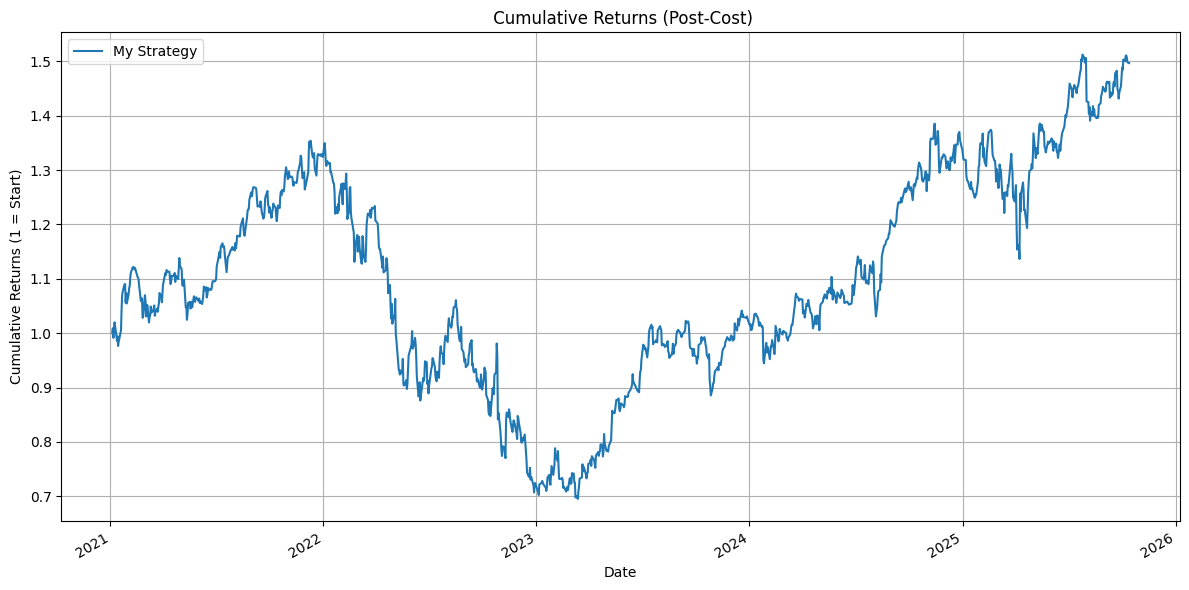

In [180]:
import matplotlib.pyplot as plt

daily_pct_returns = daily_close_prices.pct_change()

strategy_returns_no_cost = (daily_signals.shift(1) * daily_pct_returns).sum(axis=1)
weight_changes = daily_signals.diff().abs().sum(axis=1)

transaction_costs = weight_changes * 0.001

strategy_returns_post_cost = strategy_returns_no_cost - transaction_costs
strategy_returns_post_cost = strategy_returns_post_cost.fillna(0.0)


strategy_cum_returns = (1 + strategy_returns_post_cost).cumprod()


# Plot using matplotlib
plt.figure(figsize=(12, 6))
(strategy_cum_returns).plot(label='My Strategy')
plt.title(' Cumulative Returns (Post-Cost)')
plt.ylabel('Cumulative Returns (1 = Start)')
plt.xlabel('Date')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('cumulative_returns.png')

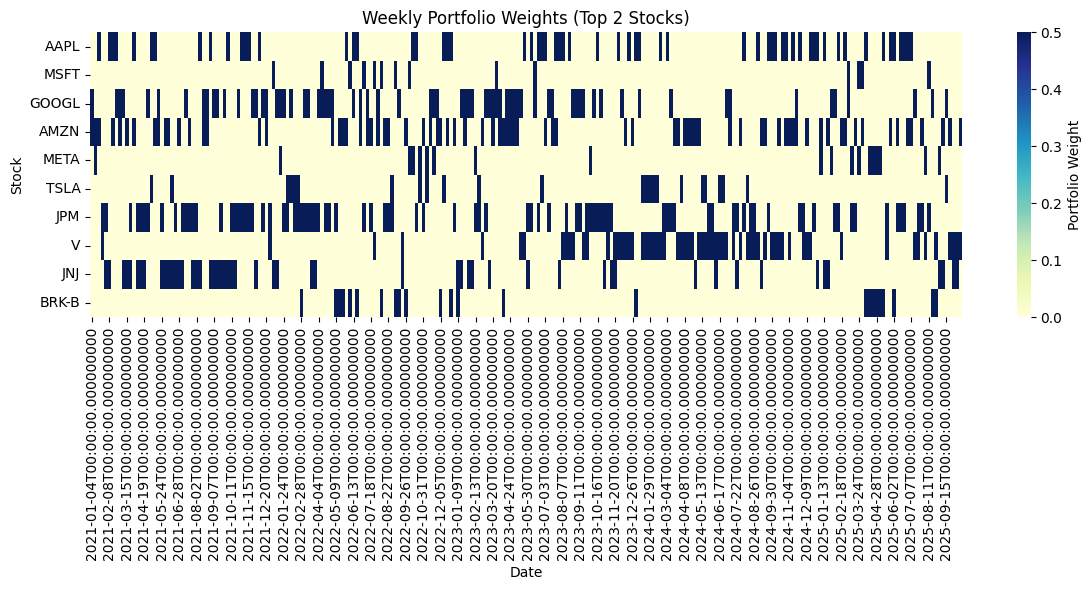

In [181]:
import seaborn as sns

plt.figure(figsize=(12, 6))

weekly_weights_to_plot = portfolio_weights[portfolio_weights.sum(axis=1) > 0]

sns.heatmap(weekly_weights_to_plot.T, cmap='YlGnBu', annot=False,
            cbar_kws={'label': 'Portfolio Weight'})
plt.title('Weekly Portfolio Weights (Top 2 Stocks)')
plt.ylabel('Stock')
plt.xlabel('Date')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('weights_heatmap.png')